In [4]:
import numpy as np 
import pandas as pd 

import tensorflow as tf

import os
import cv2

In [37]:
import matplotlib.pyplot as plt

In [6]:
def load_images(folder):
    all_images = []

    for species_name in os.listdir(folder):
        species_folder = os.path.join(folder, species_name)
        if not os.path.isdir(species_folder):
            continue

        for image_file in os.listdir(species_folder):
            image_path = os.path.join(species_folder, image_file)
            if not os.path.isfile(image_path):
                continue
            img = cv2.imread(image_path)
            all_images.append(img)

    return all_images

In [28]:
folder = 'C:/Users/Dipta/Desktop/capstone/Model Training/animals/animals/'
images = load_images(folder)

In [38]:
def display_image(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

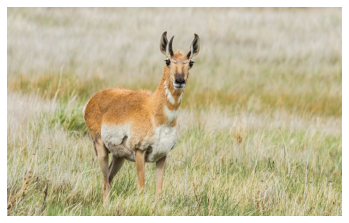

In [39]:
display_image(images[0])

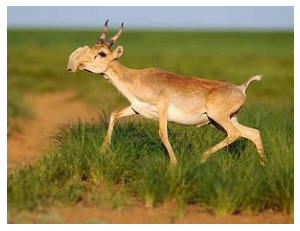

In [40]:
display_image(images[1])

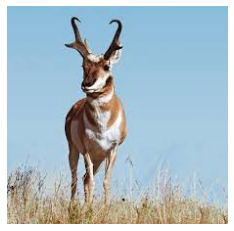

In [41]:
display_image(images[2])

In [1]:
import os
import numpy as np
import torch
from torch import nn
from torch import optim 
from torch.autograd import Variable
import torch.utils.data as data
import torchvision
from torchvision import models
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torchvision.datasets import ImageFolder

In [ ]:
res_18_model = models.resnet18(pretrained=True)


/Users/dipta/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/dipta/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/dipta/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torchvision.datasets as datasets
import torch
from torch import nn
from torch.utils.data import DataLoader

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/raw-img'):
    for filename in filenames:
        path, folder = os.path.split(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from tqdm import tqdm
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
dataset = datasets.ImageFolder('./raw-img', transform = data_transform)

# Simple CNN Model
class AnimalClassifier(nn.Module):
    def __init__(self):
        super(AnimalClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        self.fc1 = nn.Linear(64 * 56 * 56, 512)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)
#         self.output = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 64 * 56 * 56)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
#         x = self.output(x)
        return x

# Initialize the model
model = AnimalClassifier()

# Use GPU if available
if torch.cuda.is_available():
    model.cuda()

In [3]:
from torch.utils.data import random_split

# Define the train-test split ratio
train_ratio = 0.8
total_size = len(dataset)
train_size = int(train_ratio * total_size)
test_size = total_size - train_size

# Split the dataset into train and test sets
train_set, test_set = random_split(dataset, [train_size, test_size])

batch_size = 512
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-8)

num_epochs = 20

In [ ]:
# Train the model
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(tqdm(train_loader), 0):
        inputs, labels = data
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")

print("Training completed.")

  0%|                                                    | 0/41 [00:00<?, ?it/s]

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16

plt.rcParams['font.size'] = 14

ModuleNotFoundError: No module named 'pandas'

In [ ]:
import tensorflow as tf